# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [1]:
# your code
import pandas as pd
insurance = '/kaggle/input/insurance-lab02/Lab02/insurance.csv'
df = pd.read_csv(insurance)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* Age, bmi, children, and charges are numeric features
* Sex, smoker, and region are categorical features

### Q2. Check whether there are missing values in this dataset.

In [4]:
# your code
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


In [5]:
# your code
import numpy as np
df._get_numeric_data().head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

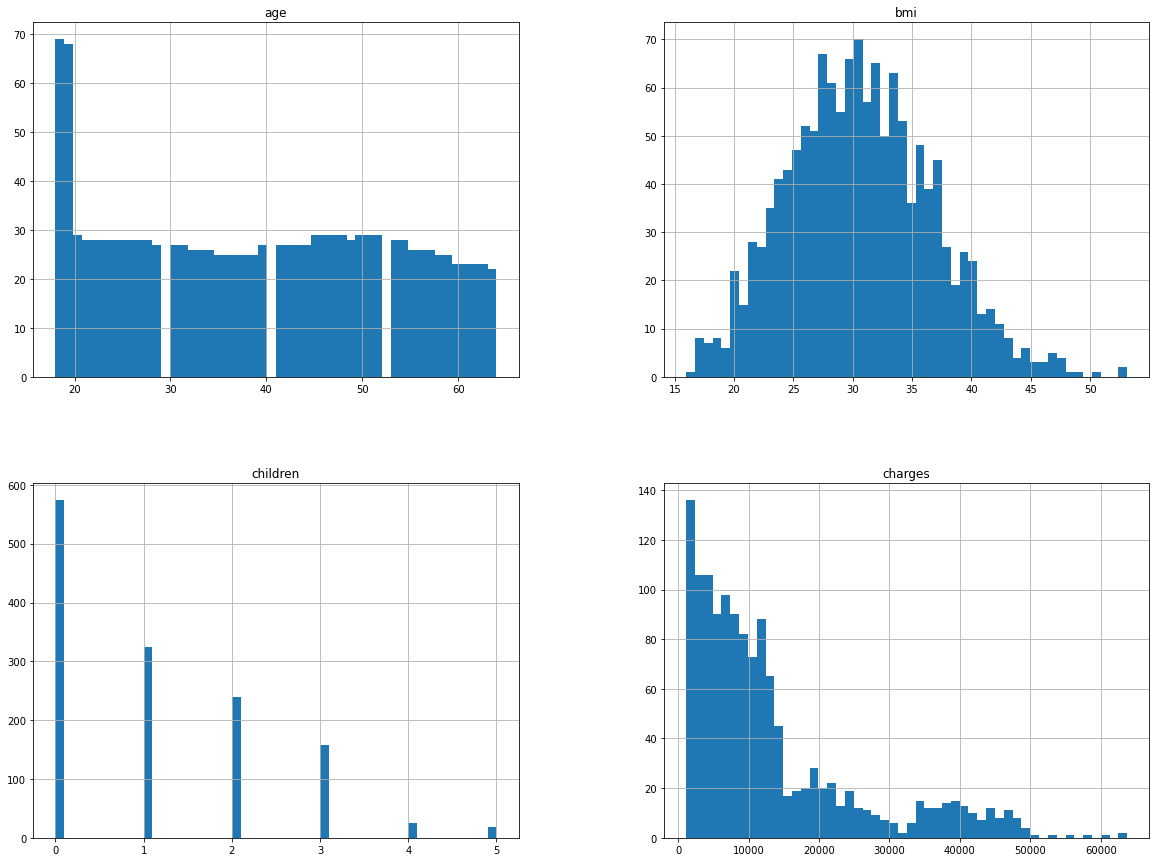

In [6]:
df._get_numeric_data().hist(bins=50,figsize=(20,15))

### Children may be categorical feature

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [7]:
# your code
df._get_numeric_data().corr().style.background_gradient()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

In [8]:
cat = df.select_dtypes(include='object').columns.tolist()
cat

['sex', 'smoker', 'region']

In [9]:
numeric = df._get_numeric_data().columns.tolist()
numeric

['age', 'bmi', 'children', 'charges']

In [10]:
df[cat].value_counts()

sex     smoker  region   
female  no      southwest    141
                southeast    139
                northwest    135
male    no      southeast    134
female  no      northeast    132
male    no      northwest    132
                southwest    126
                northeast    125
        yes     southeast     55
                northeast     38
                southwest     37
female  yes     southeast     36
                northeast     29
                northwest     29
male    yes     northwest     29
female  yes     southwest     21
dtype: int64

<AxesSubplot:xlabel='sex'>

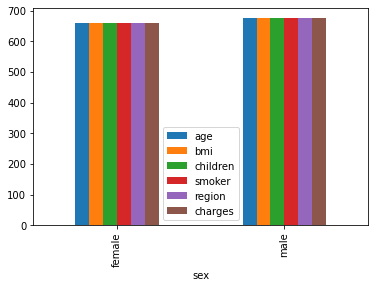

In [11]:
# your code
df.groupby(cat[0]).count().plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

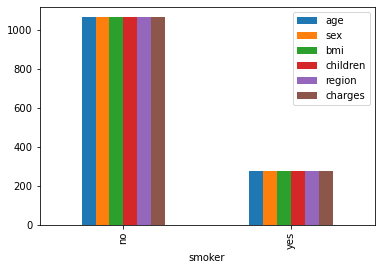

In [12]:
df.groupby(cat[1]).count().plot(kind='bar')

<AxesSubplot:xlabel='region'>

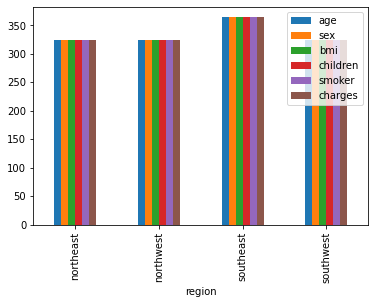

In [13]:
df.groupby(cat[2]).count().plot(kind='bar')

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [14]:
# your code
one_hot = pd.get_dummies(df[cat])
one_hot.shape

(1338, 8)

In [15]:
one_hot.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0


### Q7. Normalize all numerical features

In [16]:
# your code
df[numeric] = (df[numeric]-df[numeric].mean())/df[numeric].std()
df[numeric].head()

,age,bmi,children,charges
0,-1.438227,-0.453151,-0.908274,0.298472
1,-1.509401,0.509431,-0.078738,-0.953333
2,-0.797655,0.383164,1.580335,-0.728402
3,-0.441782,-1.305043,-0.908274,0.719574
4,-0.512957,-0.292447,-0.908274,-0.776512


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438227,female,-0.453151,-0.908274,yes,southwest,0.298472
1,-1.509401,male,0.509431,-0.078738,no,southeast,-0.953333
2,-0.797655,male,0.383164,1.580335,no,southeast,-0.728402
3,-0.441782,male,-1.305043,-0.908274,no,northwest,0.719574
4,-0.512957,male,-0.292447,-0.908274,no,northwest,-0.776512


In [18]:
out = '/kaggle/working/'

In [19]:
insurance = "".join(insurance.split('/')[:-1])
pd.concat([df, one_hot], axis=1).to_csv(out+"lab02_preprocessing.csv")